In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('cidds_preprocessed.csv')
df[0:10]

C:\Users\ANKIT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ProtocolName,SrcIPAddress,SrcPort,DstIPAddress,DstPort,Packets,Bytes,Tag,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,200000000,8082,100000000,56978.0,3057,2100000,1,NaN,NaN,1- ATTACK
1,1,100000000,56978,200000000,8082.0,4748,2500000,1,NaN,NaN,0-NORMAL
2,1,200000000,8082,100000000,56979.0,8639,9100000,1,NaN,NaN,NaN
3,1,100000000,56979,200000000,8082.0,12024,10300000,1,NaN,NaN,NaN
4,1,200000000,8082,100000000,51649.0,11012,27200000,1,NaN,NaN,NaN
5,1,100000000,51649,200000000,8082.0,14186,1200000,1,NaN,NaN,NaN
6,1,200000000,8082,100000000,37039.0,9974,31900000,1,NaN,NaN,NaN
7,1,100000000,37039,200000000,8082.0,16476,1700000,1,NaN,NaN,NaN
8,1,200000000,8082,100000000,48380.0,10178,25200000,1,NaN,NaN,NaN
9,1,100000000,48380,200000000,8082.0,14552,2600000,1,NaN,NaN,NaN


In [4]:
pd.set_option("display.float", "{:.2f}".format)

In [5]:
df.describe()

,ProtocolName,SrcIPAddress,SrcPort,DstIPAddress,DstPort,Packets,Bytes,Tag,Unnamed: 8,Unnamed: 9
count,671241.00,671241.00,671241.00,671241.00,671241.00,671241.00,671241.00,671241.00,0.00,0.00
mean,1.05,157011895.87,22546.26,157891171.06,22280.27,24.01,20001.40,0.20,nan,nan
std,0.30,86158949.59,23975.27,85830713.89,23942.46,1044.98,1950428.42,0.40,nan,nan
min,1.00,1000105.00,0.00,1000105.00,0.00,1.00,28.00,0.00,nan,nan
25%,1.00,100000000.00,22.00,100000000.00,22.00,5.00,264.00,0.00,nan,nan
50%,1.00,200000000.00,8000.00,200000000.00,8000.00,8.00,1326.00,0.00,nan,nan
75%,1.00,200000000.00,49302.00,200000000.00,49075.00,19.00,3004.00,0.00,nan,nan
max,4.00,2168253221.00,65535.00,2168253221.00,65535.00,176609.00,509200000.00,1.00,nan,nan


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671241 entries, 0 to 671240
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ProtocolName  671241 non-null  int64  
 1   SrcIPAddress  671241 non-null  int64  
 2   SrcPort       671241 non-null  int64  
 3   DstIPAddress  671241 non-null  int64  
 4   DstPort       671241 non-null  float64
 5   Packets       671241 non-null  int64  
 6   Bytes         671241 non-null  int64  
 7   Tag           671241 non-null  int64  
 8   Unnamed: 8    0 non-null       float64
 9   Unnamed: 9    0 non-null       float64
 10  Unnamed: 10   2 non-null       object 
dtypes: float64(3), int64(7), object(1)
memory usage: 56.3+ MB


## Total percentage of data is missing

In [7]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

27.272700185856564


In [8]:
for i in df.columns:
    print(df[i].unique())

[1 3 2 4]
[200000000 100000000 100000214 ... 398340124 398350183  39836041]
[ 8082 56978 56979 ...   321 46216 30364]
[100000000 200000000 100000214 ... 398340124 398350183  39836041]
[56978.  8082. 56979. ...   321. 46216. 30364.]
[  3057   4748   8639  12024  11012  14186   9974  16476  10178  14552
  17031  24706  24161  34136  13266  20751      1     19     13     18
      7     12     20     15      6     16     14     17      8      9
      2      4      5     21     22     90     88     10     24     23
     25     11      3     30     27    126    105    433    276     28
     32    178    180     38    534   1061   1062   1133     37     34
     43     33     36     31     26     29     35     70     68     67
     64    123    133     98     95     87     93    100    110   1405
   1730   3313   4678   1306   1533   1186   1434     76     66    144
    151    109   9516  12846  11184  15805     49     50     48     51
     44     45     42     39     79     69     78     56  

<AxesSubplot:>

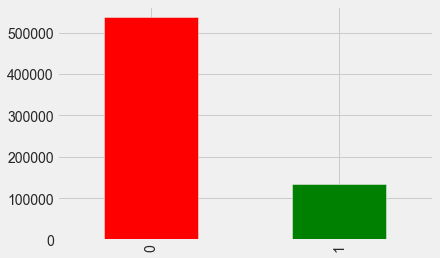

In [9]:
df.Tag.value_counts().plot(kind="bar", color=["red", "green"])

## Data Cleaning

In [10]:
df.isna().sum()

ProtocolName         0
SrcIPAddress         0
SrcPort              0
DstIPAddress         0
DstPort              0
Packets              0
Bytes                0
Tag                  0
Unnamed: 8      671241
Unnamed: 9      671241
Unnamed: 10     671239
dtype: int64

In [11]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,ProtocolName,0.00
1,SrcIPAddress,0.00
2,SrcPort,0.00
3,DstIPAddress,0.00
4,DstPort,0.00
5,Packets,0.00
6,Bytes,0.00
7,Tag,0.00
8,Unnamed: 8,100.00
9,Unnamed: 9,100.00


In [12]:
df = df.drop(['Unnamed: 8','Unnamed: 9', 'Unnamed: 10'], axis=1)

In [13]:
df.head()

,ProtocolName,SrcIPAddress,SrcPort,DstIPAddress,DstPort,Packets,Bytes,Tag
0,1,200000000,8082,100000000,56978.00,3057,2100000,1
1,1,100000000,56978,200000000,8082.00,4748,2500000,1
2,1,200000000,8082,100000000,56979.00,8639,9100000,1
3,1,100000000,56979,200000000,8082.00,12024,10300000,1
4,1,200000000,8082,100000000,51649.00,11012,27200000,1


In [14]:
df.isna().sum()

ProtocolName    0
SrcIPAddress    0
SrcPort         0
DstIPAddress    0
DstPort         0
Packets         0
Bytes           0
Tag             0
dtype: int64

## show a few features with their Mutual Info scores

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
x = df.copy()
y = x.pop('Tag')

In [17]:
for colname in x.select_dtypes('object'):
    x[colname],_ = x[colname].factorize()
    
discrete_features = x.dtypes ==int

In [18]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores[::1]

Bytes          0.49
Packets        0.38
SrcPort        0.32
DstPort        0.32
SrcIPAddress   0.25
DstIPAddress   0.25
ProtocolName   0.01
Name: MI Scores, dtype: float64

## Data Visualization With most Dependent Features

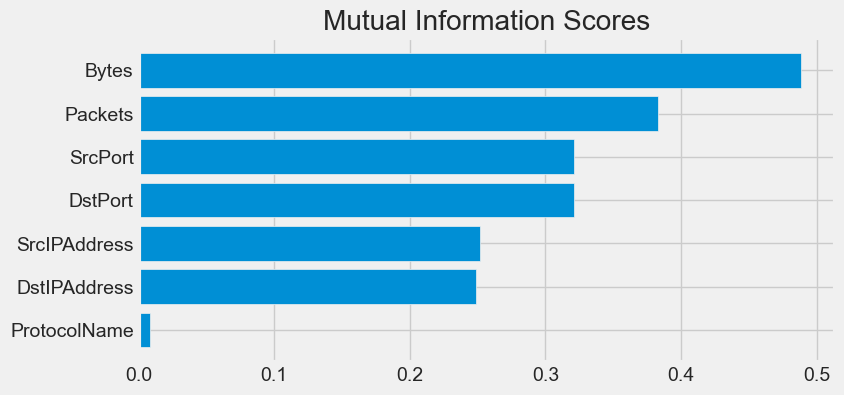

In [19]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 4))
plot_mi_scores(mi_scores)

#### Multivariate Analysis

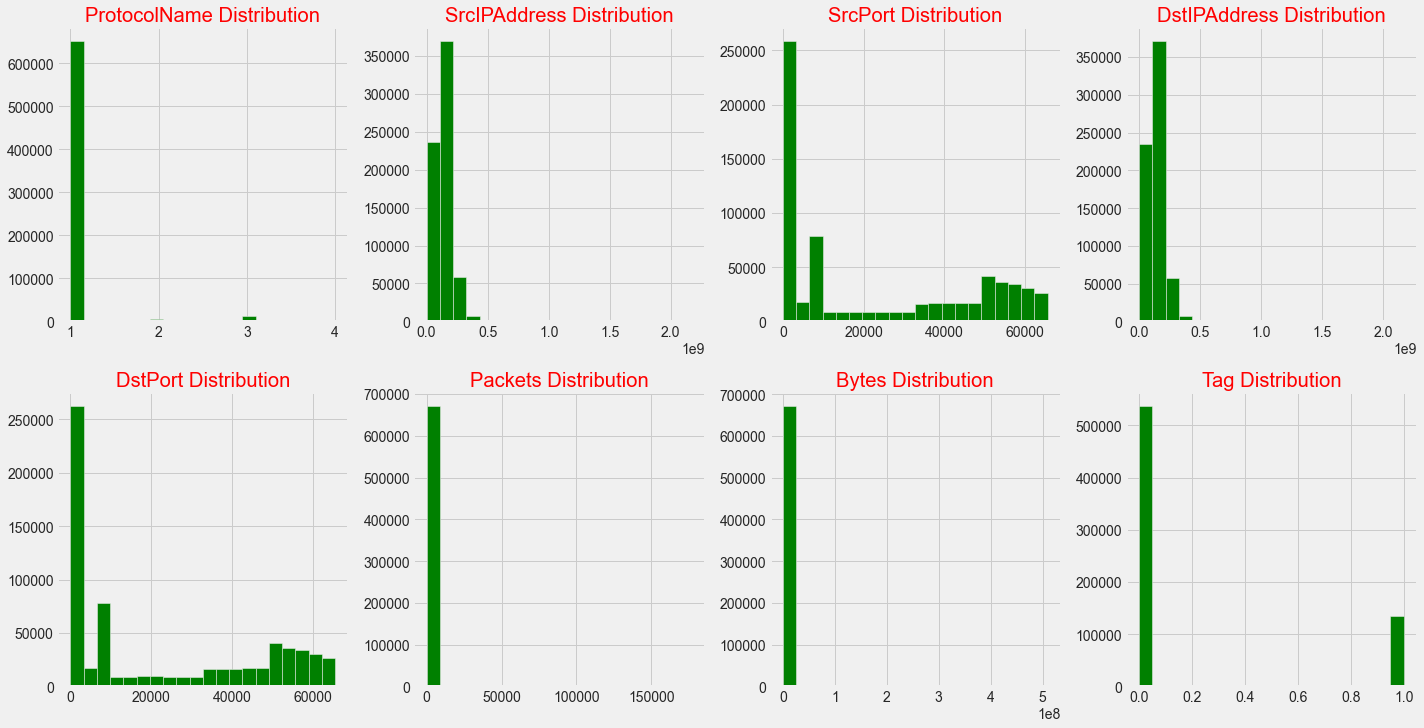

In [20]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='Red')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,4,4)

In [21]:
r = np.random.RandomState(0)
df1 = pd.DataFrame(r.rand(10,10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ProtocolName,SrcIPAddress,SrcPort,DstIPAddress,DstPort,Packets,Bytes,Tag
ProtocolName,1.000000,-0.070458,-0.005891,0.025682,-0.078128,-0.003662,-0.001719,-0.084743
SrcIPAddress,-0.070458,1.000000,-0.357432,-0.244782,0.400921,-0.000261,0.006032,-0.040690
SrcPort,-0.005891,-0.357432,1.000000,0.405272,-0.660333,0.002924,-0.000495,0.205104
DstIPAddress,0.025682,-0.244782,0.405272,1.000000,-0.353446,-0.000335,-0.003133,-0.045968
DstPort,-0.078128,0.400921,-0.660333,-0.353446,1.000000,0.002915,0.005459,0.210946
Packets,-0.003662,-0.000261,0.002924,-0.000335,0.002915,1.000000,0.731802,0.018918
Bytes,-0.001719,0.006032,-0.000495,-0.003133,0.005459,0.731802,1.000000,0.013602
Tag,-0.084743,-0.040690,0.205104,-0.045968,0.210946,0.018918,0.013602,1.000000


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [23]:
X_train.shape

(536992, 7)

In [24]:
from sklearn.metrics import accuracy_score

## logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [26]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 73.68 %


## Navie bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [28]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 79.94 %


## XG Boost

In [29]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:28:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [30]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


## Model With Best Scores

In [42]:
scores = [score_lr,score_nb,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 73.68 %
The accuracy score achieved using Naive Bayes is: 79.94 %
The accuracy score achieved using XGBoost is: 100.0 %


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

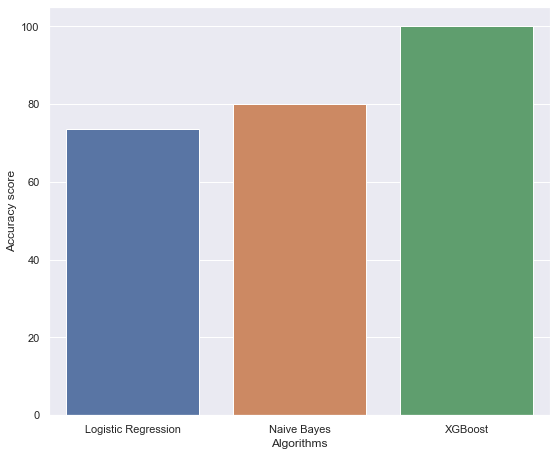

In [44]:
sns.set(rc={'figure.figsize':(8,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)